# Import Libraries

In [55]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler      #standrization scalaing =(x-mean)/stdddev
from sklearn.model_selection import train_test_split  # This func to Split arrays or matrices into random train and test subsets
from sklearn import svm                               # Support Vector machine 
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline

# Loading Dataframe

In [56]:
# loading the diabetes dataset to a pandas DataFrame
df_diabetes = pd.read_csv('diabetes.csv') 
df_diabetes.head()    # printing the first 5 rows of the dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploratory Data Analysis (EDA)

In [57]:
df_diabetes.columns # to see columns available in our dataset.

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [58]:
df_diabetes.info() #Information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [59]:
df_diabetes.describe()  #To know more about the dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [60]:
df_diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
df_diabetes.isnull()#checking for missing data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


<b> There no misiing values in our data set<b>

In [8]:
df_diabetes.isnull().sum()  #to check that is there any null values 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<b>Checking if there are zeros in dataset features <b>

In [9]:
df_diabetes_copy = df_diabetes.copy(deep = True)
df_diabetes_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_diabetes_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# Showing the Count of NANs
print(df_diabetes_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


# Data Visualization


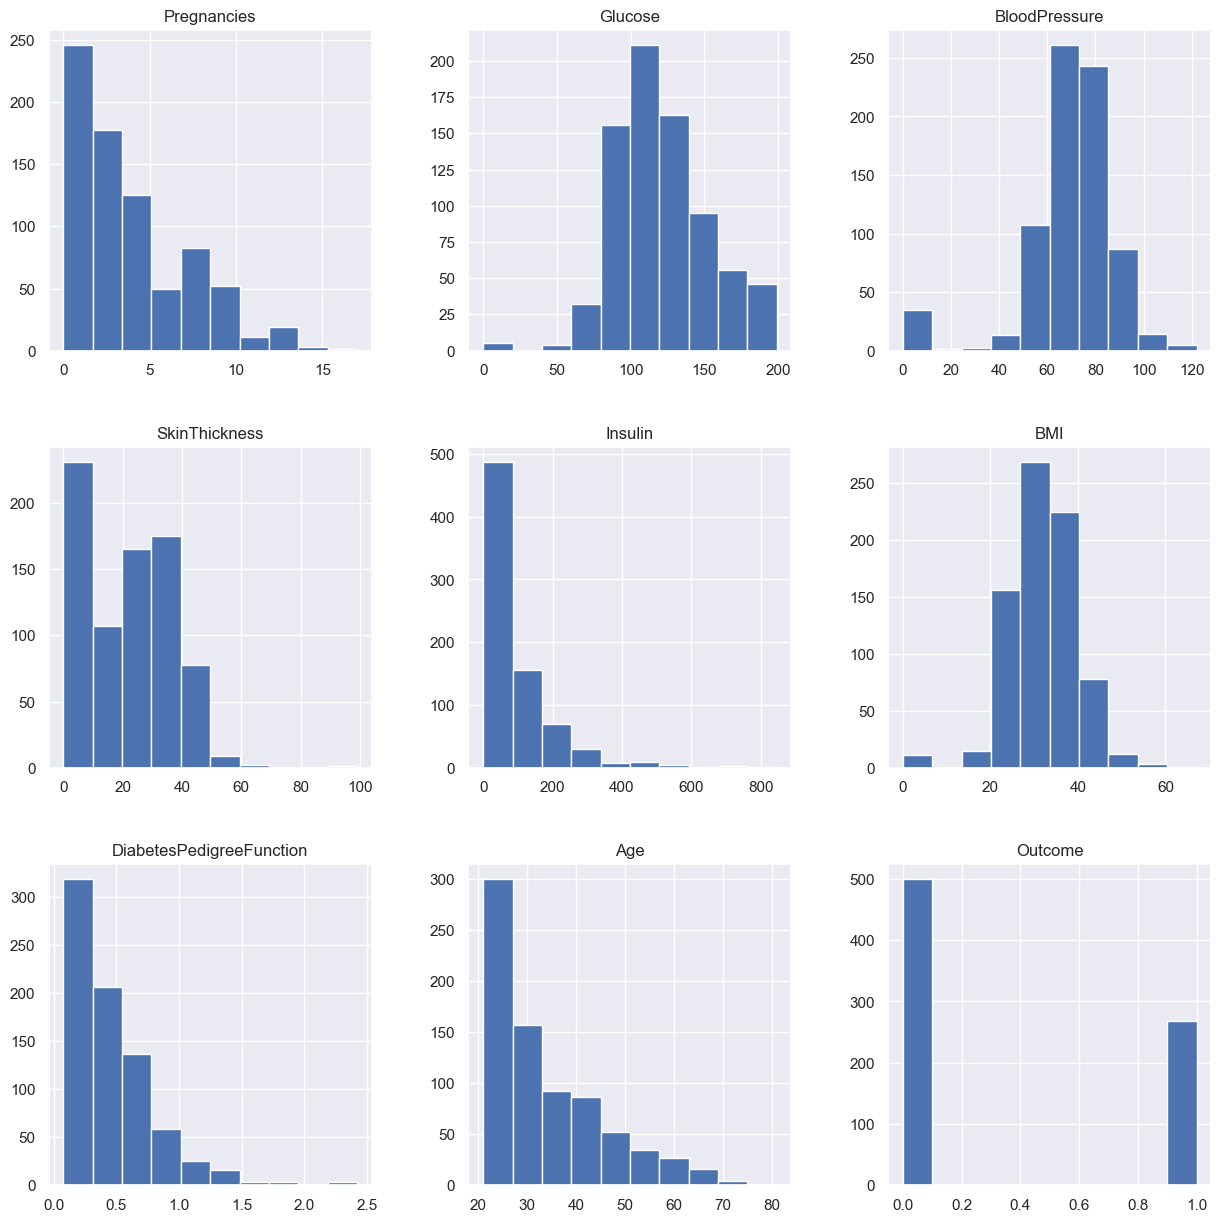

In [10]:
p = df_diabetes.hist(figsize = (15,15)) #shows the occurrence of every kind of value befor cleaning 

### Replacing the NAN values in Features with their coulms mean and median<b>

In [11]:
df_diabetes_copy['Glucose'].fillna(df_diabetes_copy['Glucose'].mean(), inplace = True) #replace the zeros with the mean values 
df_diabetes_copy['BloodPressure'].fillna(df_diabetes_copy['BloodPressure'].mean(), inplace = True)
df_diabetes_copy['SkinThickness'].fillna(df_diabetes_copy['SkinThickness'].median(), inplace = True)
df_diabetes_copy['Insulin'].fillna(df_diabetes_copy['Insulin'].median(), inplace = True)
df_diabetes_copy['BMI'].fillna(df_diabetes_copy['BMI'].median(), inplace = True)


In [12]:
print(df_diabetes_copy.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


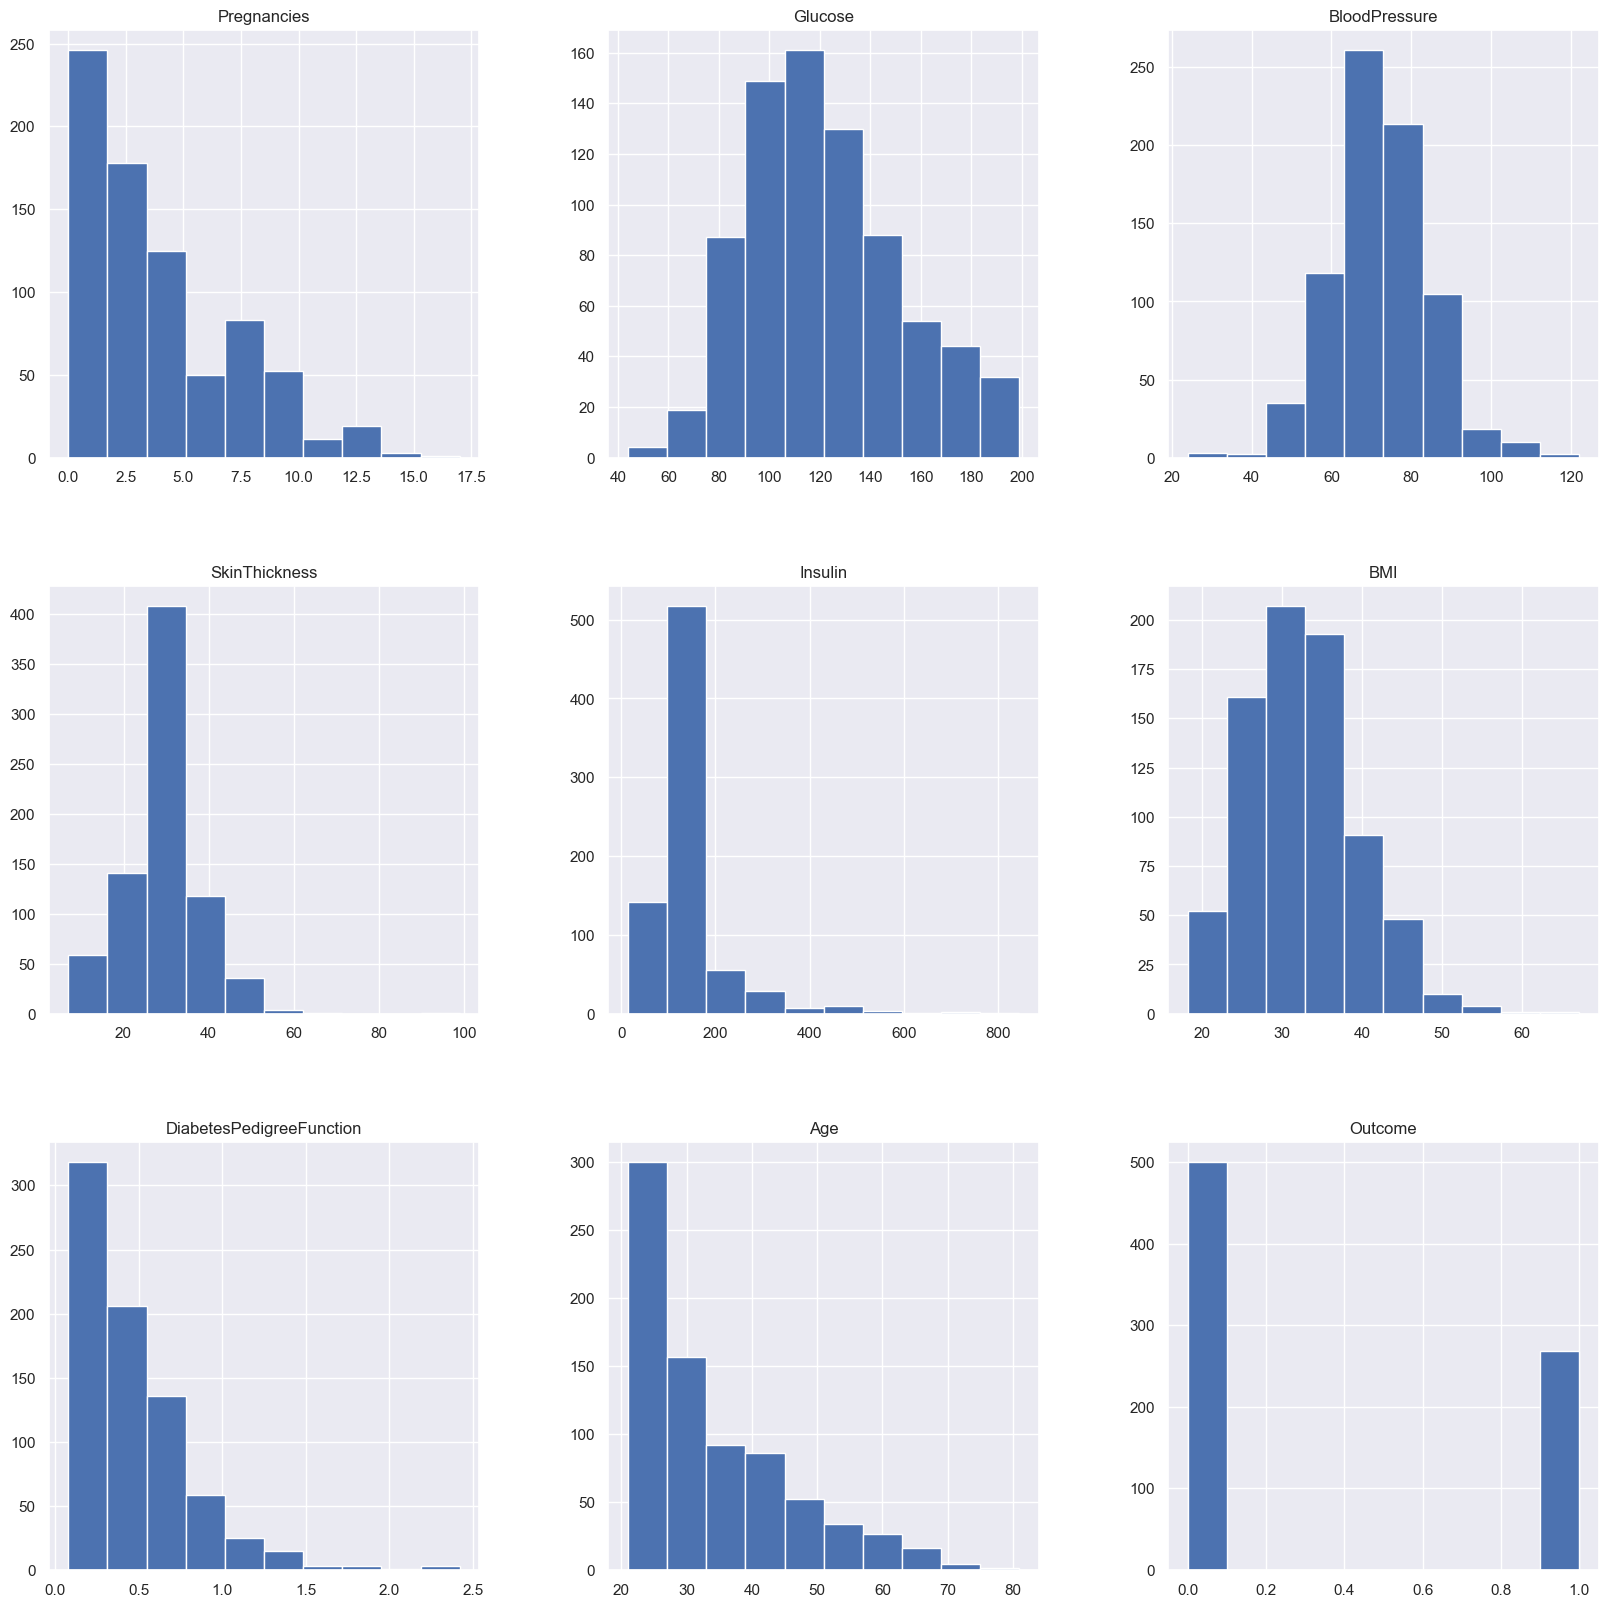

In [13]:
#Plotting the distributions after removing the NAN values.
p = df_diabetes_copy.hist(figsize = (20,20))

0    500
1    268
Name: Outcome, dtype: int64


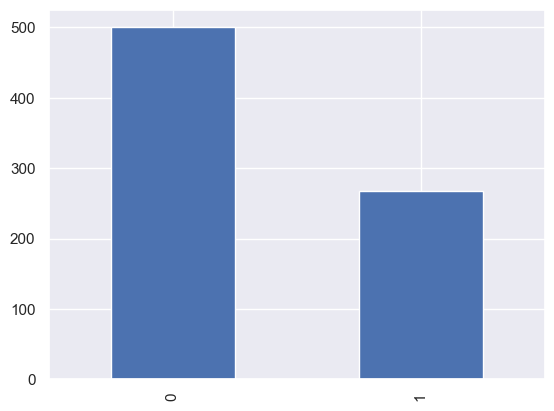

In [14]:
print(df_diabetes.Outcome.value_counts())
p=df_diabetes.Outcome.value_counts().plot(kind="bar")

In [15]:
df_diabetes_copy.sort_values(by=['Outcome'], ascending = True)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
383,1,90.0,62.000000,18.0,59.0,25.1,1.268,25,0
465,0,124.0,56.000000,13.0,105.0,21.8,0.452,21,0
466,0,74.0,52.000000,10.0,36.0,27.8,0.269,22,0
467,0,97.0,64.000000,36.0,100.0,36.8,0.600,25,0
469,6,154.0,78.000000,41.0,140.0,46.1,0.571,27,0
...,...,...,...,...,...,...,...,...,...
193,11,135.0,72.405184,29.0,125.0,52.3,0.578,40,1
485,0,135.0,68.000000,42.0,250.0,42.3,0.365,24,1
484,0,145.0,72.405184,29.0,125.0,44.2,0.630,31,1
186,8,181.0,68.000000,36.0,495.0,30.1,0.615,60,1


In [16]:
df1 =df_diabetes_copy[:500]
df2 =df_diabetes_copy[500:768]

# Correlation between all the features


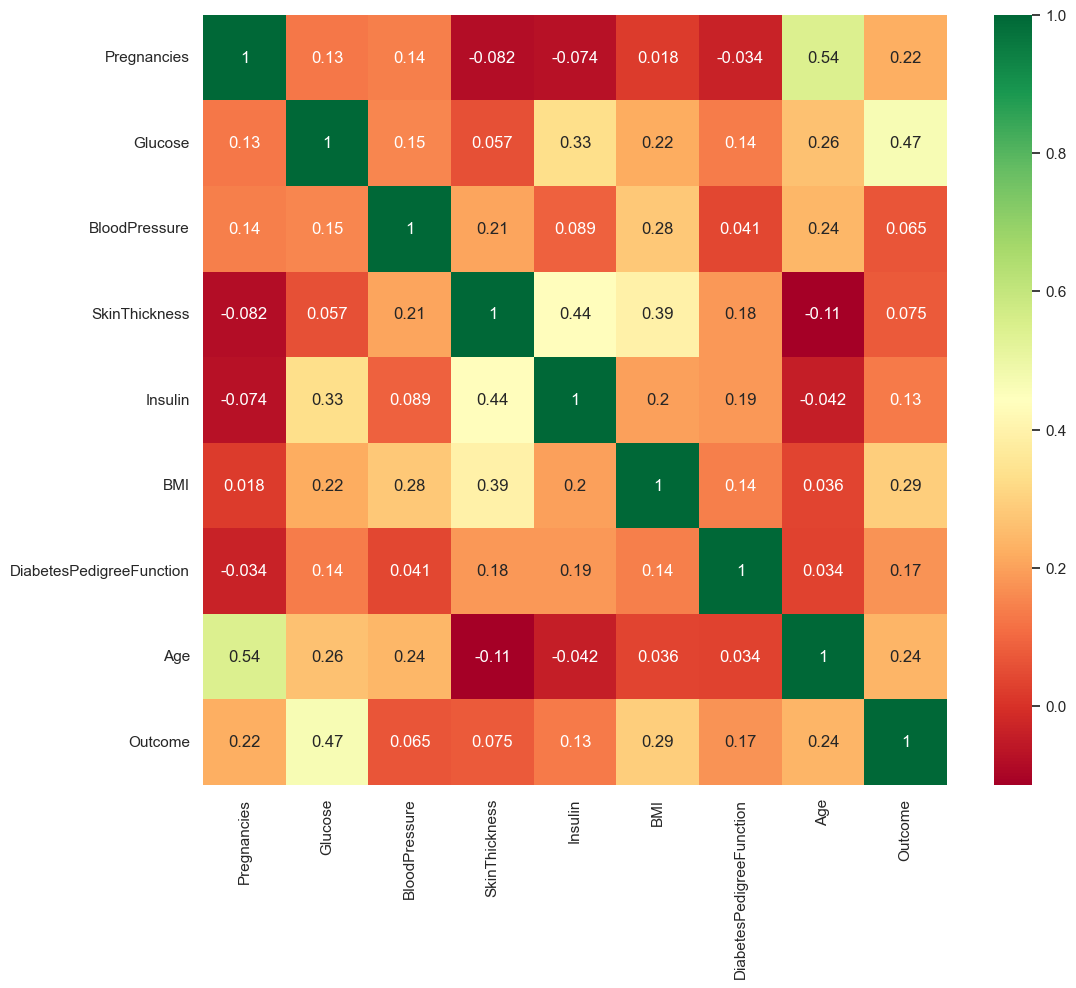

In [17]:
plt.figure(figsize=(12,10)) #the extent to which variables are linearly related
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(df_diabetes.corr(), annot=True,cmap ='RdYlGn')

In [18]:
df_diabetes_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [19]:
X = df_diabetes_copy.drop('Outcome', axis=1)
Y= df_diabetes_copy['Outcome']

In [20]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47


In [21]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# Scaling the Data

In [22]:
scaler = StandardScaler()
X =  pd.DataFrame(scaler.fit_transform(df_diabetes_copy.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [23]:
Y = df_diabetes_copy['Outcome']

In [24]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# Model Building

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


# 1.0 DecisionTree


In [44]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [53]:
dt_train = dtree.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(Y_train, dt_train)))# Train model is overfitting

Accuracy_Score = 1.0


In [45]:
from sklearn import metrics

predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(Y_test,predictions)))

Accuracy Score = 0.6753246753246753


### Classifcation Report
$Precision = \frac{TP}{TP + TN}$
measure of the success of prediction when the classes are very imbalanced


$Recall = \frac{TP}{TP + FN}$
the ability of a classifier to correctly find all positive instances

$F1-Score = 2 * \frac
{Precision*Recall}{Precision+Recall}$ 

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test,predictions))

[[79 21]
 [29 25]]
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       100
           1       0.54      0.46      0.50        54

    accuracy                           0.68       154
   macro avg       0.64      0.63      0.63       154
weighted avg       0.67      0.68      0.67       154



# 2.0 Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [50]:
rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(Y_train, rfc_train)))# Train model is overfitting

Accuracy_Score = 1.0


In [51]:
from sklearn import metrics

predictions = rfc.predict(X_test) 
print("Accuracy_Score =", format(metrics.accuracy_score(Y_test, predictions)))

Accuracy_Score = 0.7532467532467533


In [52]:
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test,predictions))

[[86 14]
 [24 30]]
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       100
           1       0.68      0.56      0.61        54

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154



## 2.1 Feature importance 

In [31]:
rfc.feature_importances_

array([0.08015548, 0.259264  , 0.08901633, 0.07844377, 0.09098769,
       0.15641132, 0.1227068 , 0.12301462])

<AxesSubplot:>

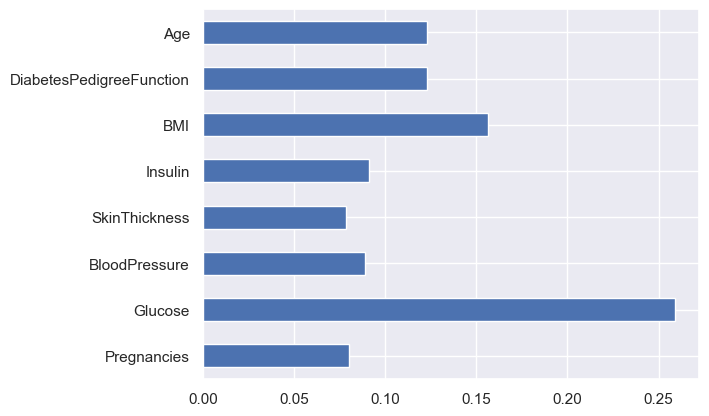

In [32]:
(pd.Series(rfc.feature_importances_, index=X.columns).plot(kind='barh')) #how much each feature contributes to the model prediction.

# 3 Support Vector Machine

In [33]:
classifier = svm.SVC(kernel='linear',C=2) 

In [34]:
classifier.fit(X_train, Y_train)

SVC(C=2, kernel='linear')

In [35]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [36]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7768729641693811


In [37]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [38]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


In [42]:
print(confusion_matrix(Y_test, X_test_prediction))
print(classification_report(Y_test,X_test_prediction))

[[91  9]
 [26 28]]
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.52      0.62        54

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154



# 3.1 Making a Predictive System using SVM

In [40]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.45689939 -0.03351824 -1.15054099  0.39765315 -0.96863623
   0.34768723  1.51108316]]
[1]
The person is diabetic


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
